In [1]:
import json 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def read_metrics(file):
    """Reads a JSON file and aggregates Bandit confidence and severity metrics."""
    with open(file, "r") as f:
        data = json.load(f)

    # Extract 'results' data
    results = data.get("results", [])

    # Initialize aggregation dictionary
    summary = {
        "CONFIDENCE.HIGH": 0,
        "CONFIDENCE.LOW": 0,
        "CONFIDENCE.MEDIUM": 0,
        "SEVERITY.HIGH": 0,
        "SEVERITY.LOW": 0,
        "SEVERITY.MEDIUM": 0,
    }
    cwes = set()

    # Process each issue in results
    for issue in results:
        confidence = issue.get("issue_confidence", "").upper()
        severity = issue.get("issue_severity", "").upper()
        # Update confidence counts
        summary[f"CONFIDENCE.{confidence}"] += 1
        summary[f"SEVERITY.{severity}"] += 1

        # Collect CWE IDs
        cwe_info = issue.get("issue_cwe", {})
        cwe_id = cwe_info.get("id")
        if cwe_id:
            cwes.add(cwe_id)
    return summary, len(cwes)

In [8]:
folders = ['requests','sherlock','manim']
folder = f"{folders[2]}/BanditResults"
metrics = np.zeros((100, 7))
json_files = [f for f in os.listdir(folder) if f.endswith(".json")]

labels = ["CONFIDENCE.HIGH", "CONFIDENCE.LOW", "CONFIDENCE.MEDIUM",
        "SEVERITY.HIGH", "SEVERITY.LOW","SEVERITY.MEDIUM"]

for file in json_files:
    i = int(file.split('_')[-1][:-5]) - 1  
    metric,cwe = read_metrics(os.path.join(folder, file))
    for j in range(6):
        metrics[i][j] = metric[labels[j]]
    metrics[i][6] = cwe 


labels = ["Con:HIGH", "Con:LOW", "Con:MEDIUM","Sev:HIGH", "Sev:LOW","Sev:MEDIUM", "CWE"]
metrics_d = pd.DataFrame(metrics,columns = labels)
metrics_d

,Con:HIGH,Con:LOW,Con:MEDIUM,Sev:HIGH,Sev:LOW,Sev:MEDIUM,CWE
0,66.0,0.0,1.0,1.0,61.0,5.0,6.0
1,59.0,0.0,1.0,0.0,55.0,5.0,6.0
2,59.0,0.0,1.0,0.0,55.0,5.0,6.0
3,59.0,0.0,1.0,0.0,55.0,5.0,6.0
4,59.0,0.0,1.0,0.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...
95,70.0,0.0,1.0,4.0,57.0,10.0,5.0
96,70.0,0.0,1.0,4.0,57.0,10.0,5.0
97,70.0,0.0,1.0,4.0,57.0,10.0,5.0
98,70.0,0.0,1.0,4.0,57.0,10.0,5.0


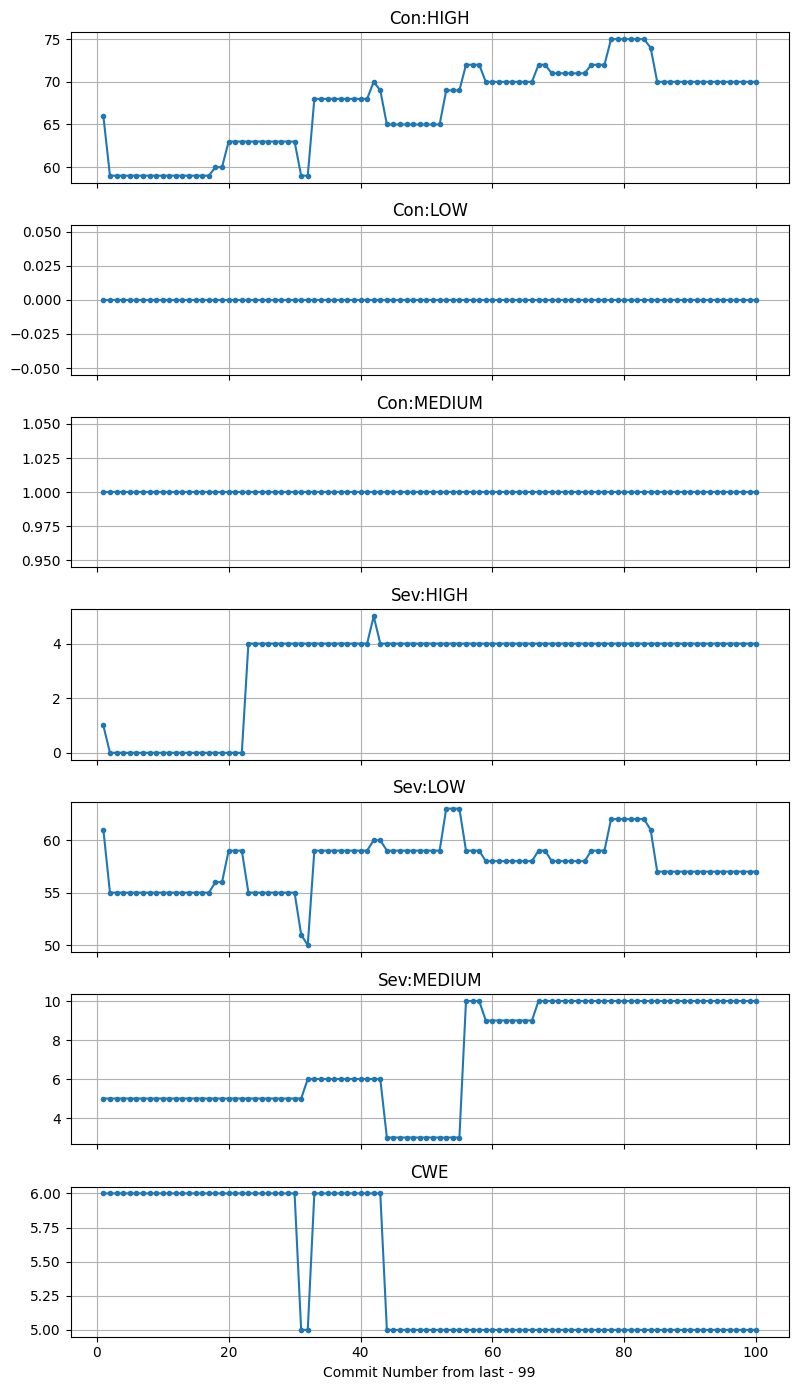

In [9]:
labels = ["Con:HIGH", "Con:LOW", "Con:MEDIUM", "Sev:HIGH", "Sev:LOW", "Sev:MEDIUM", "CWE"]
x = np.arange(1, 101)

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 14), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(x, metrics[:, i], marker='o', linestyle='-', markersize=3)
    ax.set_title(labels[i])
    ax.grid(True)

axes[-1].set_xlabel("Commit Number from last - 99")

plt.tight_layout()
plt.show()

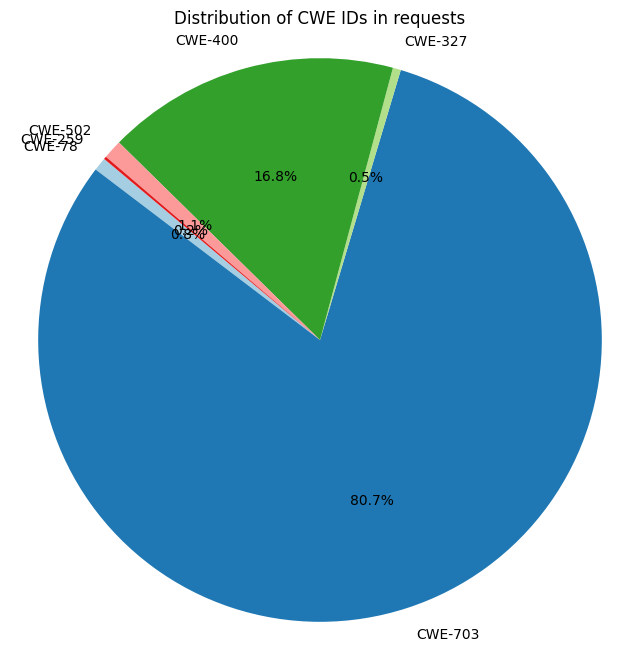

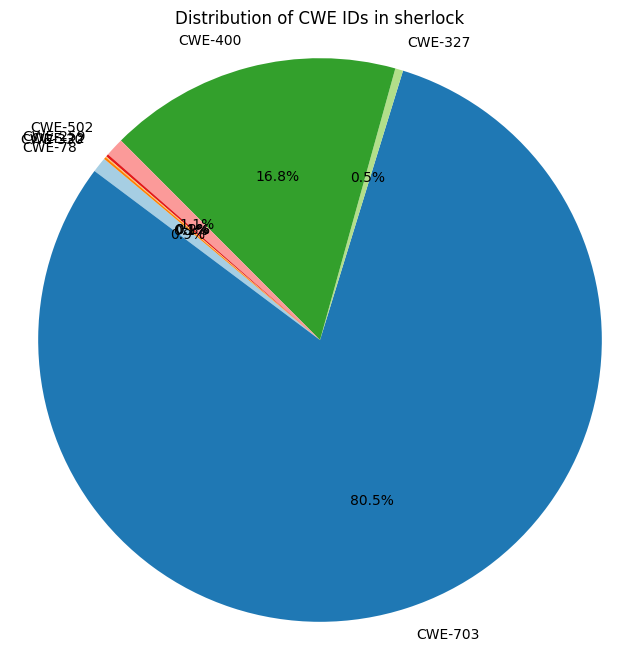

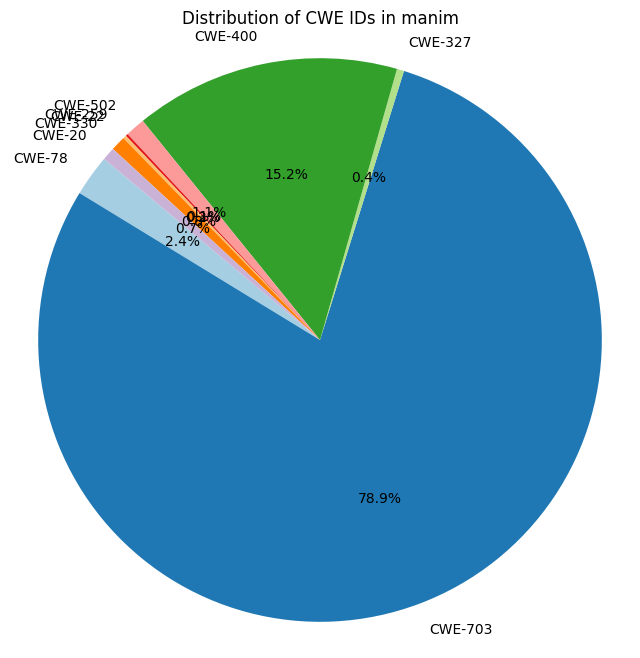

In [34]:
def plot_cwe_pie(cwe_counts, folder):
    """Plots a pie chart for CWE ID occurrences."""
    labels = [f"CWE-{cwe}" for cwe in cwe_counts.keys()]
    sizes = cwe_counts.values()

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of CWE IDs in {folder}")
    plt.axis("equal")  
    plt.show()

def count_cwe(file):
    global cwe_counts
    """Reads a JSON file and counts occurrences of CWE IDs in Bandit results."""
    with open(file, "r") as f:
        data = json.load(f)

    # Extract 'results' data
    results = data.get("results", [])

    # Process each issue in results
    for issue in results:
        cwe_info = issue.get("issue_cwe", {})
        cwe_id = cwe_info.get("id")
        if cwe_id:
            cwe_counts[cwe_id] = cwe_counts.get(cwe_id, 0) + 1  

    # return cwe_counts


folders = ['requests','sherlock','manim']
cwe_counts = {}
for i in range(3):
    folder = f"{folders[i]}/BanditResults"
    json_files = [f for f in os.listdir(folder) if f.endswith(".json")]
    for file in json_files:
        count_cwe_for_one_file = count_cwe(os.path.join(folder, file))

    plot_cwe_pie(cwe_counts,folders[i])